

# Gun violence data / Avance II - Equipo \#5



### INTEGRANTES
- Brayan Arturo Gonzalez Barron 1620548 
- Jose Eduardo Lince Alvarez 1745066 
- Gonzalo Adrián Cavazos Rodríguez 1742463 

### Objetivos
Objetivo Principal:
Al estudiar este conjunto de datos se pretende poder hacer deducciones con base al comportamiento de estos, en el aspecto de que lugares son más peligrosos, o propensos en los que ellas personas puedan sufrir de un atentado, además con base a sus características predecir el estatus del participante.

#### Objetivos Secundarios:
 - Situación final de los participantes, ya sea víctima, sospechoso, etc.
 - Que tanta posibilidad hay de morir en un incidente con arma de fuego
 - Determinar si el genero o la edad influyen en los incidentes


### Caracteristicas Principales
- Gran cantidad de datos
- Datos relativamente recientes
- Variedad de datos (Estatus final de participantes, edad, fecha, etc)

### Beneficios de trabajar con esta BD
Encontramos que hay una fuerte relacion con los datos relacionados, por lo que pudimos identificar algunos de los metodos de analisis que podriamos utilizar.
Tambien observamos que nuestra base de datos presenta datos continuos y discretos con los cuales se puede trabajar para sacar clasificaciones o regresiones que nos definan la relación que existe entre estos mismos

### Preguntas de interes
¿Cuáles son los estados más peligrosos o mortales?

¿Hay una alza o baja de incidentes por ataques de arma de fuego por estado? (Los mas peligrosos) 

*Es posible predecir el estatus final de los participantes en base a las caracteristicas de los participantes


### MOTIVACION 
A traves de distintas tecnicas de mineria de datos, poder responder a las preguntas planteadas apoyandonos de algunos de los metodos estadisticos para la prediccion de eventos en futuro.

    

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv(r"gun-violence.csv")
df

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239672,1083142,2018-03-31,Louisiana,Rayne,North Riceland Road and Highway 90,0,0,http://www.gunviolencearchive.org/incident/108...,http://www.klfy.com/news/local/rayne-woman-cha...,False,...,0::25,0::Adult 18+,0::Female,0::Jhkeya Tezeno,NaN,"0::Unharmed, Arrested",0::Subject-Suspect,http://www.klfy.com/news/local/rayne-woman-cha...,NaN,NaN
239673,1083139,2018-03-31,Louisiana,Natchitoches,247 Keyser Ave,1,0,http://www.gunviolencearchive.org/incident/108...,http://www.ksla.com/story/37854648/man-wanted-...,False,...,1::21,0::Adult 18+||1::Adult 18+,0::Male||1::Male,0::Jamal Haskett||1::Jaquarious Tyjuan Ardison,NaN,"0::Killed||1::Unharmed, Arrested",0::Victim||1::Subject-Suspect,http://www.ksla.com/story/37854648/man-wanted-...,23.0,31.0
239674,1083151,2018-03-31,Louisiana,Gretna,1300 block of Cook Street,0,1,http://www.gunviolencearchive.org/incident/108...,http://www.nola.com/crime/index.ssf/2018/04/sh...,False,...,0::21,0::Adult 18+,0::Male,NaN,NaN,0::Injured,0::Victim,http://www.nola.com/crime/index.ssf/2018/04/sh...,85.0,7.0
239675,1082514,2018-03-31,Texas,Houston,12630 Ashford Point Dr,1,0,http://www.gunviolencearchive.org/incident/108...,https://www.ch

## Preparacion

Vemos que columnas podremos encontrar en este dataset, tenemos el id para determinar numero de incidentes,
tambien fecha para saber cuando sucedieron los hechos, tenemos ubicaciones y direcciones de los eventos que
nos podrian ayudar a filtrar y crear clases de zonas, 
numero de muertos para tomar encuenta los indices de violoencia, 
edad de los participantes para tambien obtener algun indicador de edad

In [3]:
df.head(5)

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


### Conteo de datos y columnas
Podemos darnos cuenta que tenemos 239667 registros antes de realizar nuestra limpieza y alrededor de 29 columnas, no ocuparemos todas para la resolucion de las preguntas asi en la limpieza eliminaremos las que no son necesarias

In [4]:
print(df.shape)

(239677, 29)


In [5]:
df.columns

Index(['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed',
       'n_injured', 'incident_url', 'source_url',
       'incident_url_fields_missing', 'congressional_district', 'gun_stolen',
       'gun_type', 'incident_characteristics', 'latitude',
       'location_description', 'longitude', 'n_guns_involved', 'notes',
       'participant_age', 'participant_age_group', 'participant_gender',
       'participant_name', 'participant_relationship', 'participant_status',
       'participant_type', 'sources', 'state_house_district',
       'state_senate_district'],
      dtype='object')

### Renombrando Columnas
Le daremos un nombre en español a las columnas.

Ademas, podemos describir nuestras columnas de una mejor manera

In [6]:
df=df.rename(columns={'incident_id':'id', 'date':'fecha', 'state':'estado', 'city_or_county':'condado_o_localidad', 'address': 'direccion',
                 'gun_type':'tipo_arma', 'n_injured':'num_lesionados', 'location_description':'desc_lugar',
                  'participant_age':'edad_participante', 'participant_age_group':'edad_grupo_participantes',
                      'n_guns_involved' : 'armas_involucradas',
                   'participant_gender':'genero_participante', 'participant_relationship': 'relacion_participante',
                   'participant_status':'estatus_participante','participant_type':'tipo_participante', 'n_killed':'num_muertos'})

In [7]:
df.dtypes

id                               int64
fecha                           object
estado                          object
condado_o_localidad             object
direccion                       object
num_muertos                      int64
num_lesionados                   int64
incident_url                    object
source_url                      object
incident_url_fields_missing       bool
congressional_district         float64
gun_stolen                      object
tipo_arma                       object
incident_characteristics        object
latitude                       float64
desc_lugar                      object
longitude                      float64
armas_involucradas             float64
notes                           object
edad_participante               object
edad_grupo_participantes        object
genero_participante             object
participant_name                object
relacion_participante           object
estatus_participante            object
tipo_participante        

### Identificando valores unicos
Haremos una visualizacion de los valores unicos para las columnas estado, condado_o_localidad

---

In [8]:
count_column = df.estado.unique()
print( count_column , ' | Total: ', len(count_column))

['Pennsylvania' 'California' 'Ohio' 'Colorado' 'North Carolina' 'Oklahoma'
 'New Mexico' 'Louisiana' 'Maryland' 'Tennessee' 'Missouri'
 'District of Columbia' 'Illinois' 'Delaware' 'Utah' 'Michigan' 'Georgia'
 'Indiana' 'Mississippi' 'New York' 'Florida' 'Washington'
 'South Carolina' 'Arizona' 'Kentucky' 'New Jersey' 'Virginia' 'Wisconsin'
 'Rhode Island' 'Texas' 'Alabama' 'Kansas' 'Connecticut' 'West Virginia'
 'Minnesota' 'Nevada' 'Nebraska' 'Massachusetts' 'Hawaii' 'New Hampshire'
 'Iowa' 'Alaska' 'Arkansas' 'Idaho' 'Oregon' 'Wyoming' 'Maine'
 'North Dakota' 'Montana' 'Vermont' 'South Dakota']  | Total:  51


Vemos que para la columna estado tenemos un total de 51 columnas unicas, con la cual, podriamos hacer graficas ya que no presenta una gran cantidad de datos


---

In [9]:
count_column = df.condado_o_localidad.unique()
print( count_column , ' | Total: ', len(count_column))

['Mckeesport' 'Hawthorne' 'Lorain' ... 'Montgomery Creek'
 'Chaffee (Allenville)' 'St Paul']  | Total:  12898


En este caso, para la columna condado_o_localidad tenemos demasiados registros unicos, por lo que si se quisiera una grafica con estos datos, tendriamos que aminorar la cantidad, talvez buscando por los que mas coincidencias tienen.

### Datos Nulos

A continuacion, buscaremos por columna, si hay almenos algun dato nulo.
Podemos observar que las columnas fecha, estado, ciudad_o_pais, num_muertos no tienen datos en nulo, pero hay 2 campos que si vamos a ocupar, los cuales son edad_participante y estatus_participante y si contienen datos nulos.

In [10]:
df.isnull().any()

id                             False
fecha                          False
estado                         False
condado_o_localidad            False
direccion                       True
num_muertos                    False
num_lesionados                 False
incident_url                   False
source_url                      True
incident_url_fields_missing    False
congressional_district          True
gun_stolen                      True
tipo_arma                       True
incident_characteristics        True
latitude                        True
desc_lugar                      True
longitude                       True
armas_involucradas              True
notes                           True
edad_participante               True
edad_grupo_participantes        True
genero_participante             True
participant_name                True
relacion_participante           True
estatus_participante            True
tipo_participante               True
sources                         True
s

Hacemos una sumatoria, de las filas nulas por columnas, para determinar si es viable precindir de esas filar en caso
de que sean pocas, pero los resultados muestran cantidades muy grandes, por lo que no se pueden eliminar. 
Debido a esto, tendremos que tener cuidado cuando generemos los reportes donde se utilicen estas columnas, ademas 
de que son columnas con datos compuestos, por lo que es mas  complicado ponerle un valor por defecto(como el caso
de los int con 0, por ejemplo)


In [11]:
df[['edad_participante', 'estatus_participante', 'tipo_participante', 'genero_participante']].isnull().sum()

edad_participante       92298
estatus_participante    27626
tipo_participante       24863
genero_participante     36362
dtype: int64

Eliminamos los nulos de la columna armas_involucradas y lo convertimos a entero, ya que posiblemente hagamos algunas busquedas con este campo

In [12]:
df.armas_involucradas = df.armas_involucradas.fillna(0)
df.armas_involucradas = df.armas_involucradas.astype('int')


### Eliminacion de Columnas

Eliminaremos algunas columnas que en su mayoria, son valores nulos, datos que no nos interesan, y el nombre de los participantes, manteniendo asi, el anonimato de estos.

In [13]:
df = df.drop(columns={'id', 'sources', 'incident_url', 'incident_url_fields_missing', 'source_url',
                      'congressional_district', 'gun_stolen', 'tipo_arma', 'incident_characteristics',
                      'latitude', 'desc_lugar', 'longitude', 'notes', 'direccion', 
                        'incident_url', 'edad_grupo_participantes', 'participant_name', 'relacion_participante', 'sources', 'state_house_district', 'state_senate_district'},axis = 1 )

---

### Creacion de Tabla participantes
Debido a que tenemos datos compuestos con los que no podemos trabajar, vamos a dividirlo en otra tabla para que 
asi nos sea mas facil manipular los datos

In [14]:
incidente_participante = {
    'incidente_id'      : [],
    'index_participante': [],
    'edad'              : [],
    'genero'            : [],
    'estatus'           : [],
    'tipo'              : [],
}

def splitColumn(string):
    return string.split('||') if not pd.isnull(string) else []
    
def splitInfo(string):
    string_splitted = string.split('::')
    return string_splitted[1] if len(string_splitted) == 2 else None



for incidente in df.index:
    
    edades  = splitColumn(df['edad_participante'][incidente])
    generos = splitColumn(df['genero_participante'][incidente])
    estatus = splitColumn(df['estatus_participante'][incidente])
    tipo    = splitColumn(df['tipo_participante'][incidente])
    participantes  = min(len(i) for i in [edades , generos ,estatus, tipo])
    
    for participante in range(participantes):
        incidente_participante['incidente_id'].append(incidente)
        incidente_participante['index_participante'].append(participante)
        incidente_participante['edad'].append(splitInfo(edades[participante]))        
        incidente_participante['genero'].append(splitInfo(generos[participante]))
        incidente_participante['estatus'].append(splitInfo(estatus[participante]))
        incidente_participante['tipo'].append(splitInfo(tipo[participante]))
        



participantes = pd.DataFrame(incidente_participante, columns=list(incidente_participante.keys()))        

Eliminamos datos nulos de participantes

In [15]:
participantes = participantes.dropna()

Identificamos los casos unicos para las columnas 
- Genero
- Estatus
- Tipo

Observamos que para <b>genero</b> solo tenemos dos casos: 
    - Male (hombre)
    - Female (mujer)

Encontramos un caso aislado que fue 'Male, female' por lo que este será eliminado.        

In [16]:
generos_unicos = participantes.genero.unique()
print( generos_unicos , ' | Total: ', len(generos_unicos))


['Male' 'Female' 'Male, female']  | Total:  3


Eliminamos un caso aisalado que se presento en la BD

In [17]:
caso_aislados=participantes[participantes['genero']=='Male, female']
participantes = participantes.drop(caso_aislados.index, axis=0)



---

En el tipo, solo tenemos dos casos los cuales son:
- Victim
- Subject-Suspect

In [18]:
tipos_unicos =participantes.tipo.unique()
print(tipos_unicos, ' | Total: ', len(tipos_unicos))

['Victim' 'Subject-Suspect']  | Total:  2


Ahora analizaremos los estatus

In [19]:
status_unicos = participantes.estatus.unique()
print( status_unicos , ' | Total: ', len(status_unicos))



['Arrested' 'Killed' 'Injured, Unharmed, Arrested' 'Unharmed, Arrested'
 'Injured' 'Killed, Unharmed, Arrested' 'Unharmed' 'Injured, Arrested'
 'Killed, Injured' 'Killed, Unharmed' 'Killed, Arrested'
 'Injured, Unharmed']  | Total:  12


Observamos que hay distintos tipos de estutus, y algunos juntos separados por coma.
En este caso solo tomaremo 3 estatus fundamentales:
  - Arrested (arrestado)
  - Killed   (muerto)
  - Injured  (herido)
  
Y agregaremos 3 columnas para cada uno de los diferentes estatus al DataFrame para identificarlos con un 1 si se presenta este estatus, o 0 cero si no.
Despues procederemos a borrar la columna de status ya que no la necesitaremos más.

In [20]:
participantes['arrestado'] = 0
participantes['muerto'] = 0
participantes['herido'] = 0

for participante in participantes.index:
    
    status = participantes['estatus'][participante].replace(' ', '').split(',')
    participantes.loc[participantes.index == participante, 'arrestado'] = 1 if 'Arrested' in status else  0    
    participantes.loc[participantes.index == participante, 'muerto'] = 1 if 'Killed' in status else  0
    participantes.loc[participantes.index == participante, 'herido'] = 1 if 'Injured' in status else  0    

participantes.drop(['estatus'], axis=1, inplace=True)



--- 

Y por ultimo, procedemos a traducir los valores en las columnas de genero y tipo para que sea mas facil hacer las busquedas y homologar toda la BD

In [21]:
participantes['genero'].mask(participantes['genero'] == 'Male', 'hombre', inplace=True)
participantes['genero'].mask(participantes['genero'] == 'Female', 'mujer', inplace=True)
participantes['tipo'].mask(participantes['tipo'] == 'Victim', 'victima', inplace=True)
participantes['tipo'].mask(participantes['tipo'] == 'Subject-Suspect', 'sospechoso', inplace=True)

participantes

,incidente_id,index_participante,edad,genero,tipo,arrestado,muerto,herido
0,0,0,20,hombre,victima,1,0,0
1,1,0,20,hombre,victima,0,1,0
2,2,0,25,hombre,sospechoso,1,0,1
3,2,1,31,hombre,sospechoso,1,0,0
4,2,2,33,hombre,victima,0,1,0
...,...,...,...,...,...,...,...,...
215782,239673,0,21,hombre,victima,0,1,0
215783,239674,0,21,hombre,victima,0,0,1
215784,239675,0,42,hombre,victima,0,1,0
215785,239676,0,58,mujer,victima,0,1,0


---
Una vez con la tabla de participantes creada, elimnaremos las columnas de edad_participante, 
genero_participante, estatus_participante, tipo_participante

In [22]:
df.drop(columns= {'edad_participante', 'genero_participante', 'estatus_participante','tipo_participante',}, inplace=True)

Antes de concluir, exportaremos la tabla de incidentes limpia, al igual que la tabla de participantes

In [23]:
participantes.to_csv('participantes.csv', index=False)
df.to_csv('incidentes.csv', index=False)

--- 

### Identificacion de Clases
En esta caso, vamos a realizar una busqueda por el conteo de muertos, haciendo 3 clases:
- No Muertos
- 1 Muerto
- Mas de 1 muerto

Despues, procederemos a guardalas en un csv para trabajar independientemente con ellas.

In [24]:
no_muertos = df[df['num_muertos'] == 0]
no_muertos.to_csv('no_muertos.csv', index=True)

un_muerto = df[df['num_muertos'] == 1]
un_muerto.to_csv('un_muerto.csv', index=True)

mas_de_un_muerto = df[df['num_muertos'] > 1]
mas_de_un_muerto.to_csv('mas_de_un_muerto.csv', index=True)

---

Con esto podemos inferir cuales son las zonas mas y menos peligrosas, ya que pude haber un incidente, pero no quiere decir que haya muertos. 

Lo que hicimos abajo fue, obtener un conteo del listado unico donde haya habido mas de un muerto, pudiendo identificar cuales son las zonas mas mortales, aunque no quiera decir que en estos estados no haya incidentes con 0 muertos

In [25]:
len(mas_de_un_muerto.condado_o_localidad.unique())

2329

---
Y finalmente, tenemos nuestra BD preparada solo con los datos que necesitamos

In [26]:
df

,fecha,estado,condado_o_localidad,num_muertos,num_lesionados,armas_involucradas
0,2013-01-01,Pennsylvania,Mckeesport,0,4,0
1,2013-01-01,California,Hawthorne,1,3,0
2,2013-01-01,Ohio,Lorain,1,3,2
3,2013-01-05,Colorado,Aurora,4,0,0
4,2013-01-07,North Carolina,Greensboro,2,2,2
...,...,...,...,...,...,...
239672,2018-03-31,Louisiana,Rayne,0,0,1
239673,2018-03-31,Louisiana,Natchitoches,1,0,1
239674,2018-03-31,Louisiana,Gretna,0,1,1
239675,2018-03-31,Texas,Houston,1,0,1


In [27]:
participantes

,incidente_id,index_participante,edad,genero,tipo,arrestado,muerto,herido
0,0,0,20,hombre,victima,1,0,0
1,1,0,20,hombre,victima,0,1,0
2,2,0,25,hombre,sospechoso,1,0,1
3,2,1,31,hombre,sospechoso,1,0,0
4,2,2,33,hombre,victima,0,1,0
...,...,...,...,...,...,...,...,...
215782,239673,0,21,hombre,victima,0,1,0
215783,239674,0,21,hombre,victima,0,0,1
215784,239675,0,42,hombre,victima,0,1,0
215785,239676,0,58,mujer,victima,0,1,0


---
## Visualizacion

Procedemos a obtener la informacion limpiada

In [3]:
incidentes    = pd.read_csv(r"incidentes.csv")
participantes = pd.read_csv(r"participantes.csv")

### Incidentes
---
Visualizaremos primero la informacion de los incidentes

In [4]:
incidentes.head(5)

,fecha,estado,condado_o_localidad,num_muertos,num_lesionados,armas_involucradas
0,2013-01-01,Pennsylvania,Mckeesport,0,4,0
1,2013-01-01,California,Hawthorne,1,3,0
2,2013-01-01,Ohio,Lorain,1,3,2
3,2013-01-05,Colorado,Aurora,4,0,0
4,2013-01-07,North Carolina,Greensboro,2,2,2


---
Vamos a obtener los valores maximos, minimos y el promedio de cada una de las columnas numericas.

In [5]:
print(incidentes.num_muertos.describe()[['count','max', 'min', 'mean']])

count    239677.00000
max          50.00000
min           0.00000
mean          0.25229
Name: num_muertos, dtype: float64


In [6]:
print(incidentes.num_lesionados.describe()[['count','max', 'min', 'mean']])

count    239677.000000
max          53.000000
min           0.000000
mean          0.494007
Name: num_lesionados, dtype: float64


In [7]:
print(incidentes.armas_involucradas.describe()[['count','max', 'min', 'mean']])

count    239677.000000
max         400.000000
min           0.000000
mean          0.802964
Name: armas_involucradas, dtype: float64


Una observacion importante es que apesar de que las 3 columnas tienen datos muy altos, el promedio esta muy por de bajo de esa cifra, por ejemplo, en el caso de las armas involucradas, tenemos incidentes con hasta 400 armas, pero el promedio solo es de 0.8 armas por incidente, osea casi 1 arma por incidente, lo cual tenemos que estar preparados para trabajar con estos casos extraños.

---
Para poder determinar que estados son mas peligrosos, nos basaremos en el numero de muertos y heridos por incidiente, para ello obtendremos los estados donde el valor de estos es mayor o igual a 1

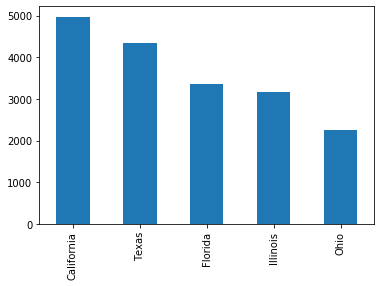

In [10]:
incidentes_muertos = incidentes[incidentes.num_muertos >= 1]['estado'].value_counts().head(5)
incidentes_muertos.plot.bar()

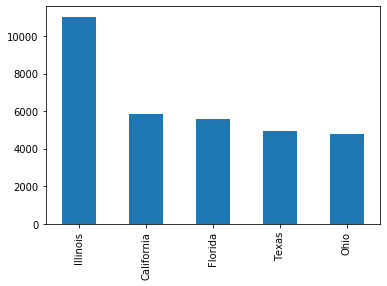

In [11]:
incidentes_lesionados = incidentes[incidentes.num_lesionados >= 1]['estado'].value_counts().head(5)
incidentes_lesionados.plot.bar()

Podemos identificar los 5 estados mas peligrosos:
- Illinois
- California
- Florida
- Texas
- Ohio

In [12]:
estados_peligrosos = list( incidentes[incidentes.num_lesionados >= 1]['estado'].value_counts().head(5).reset_index()['index'])

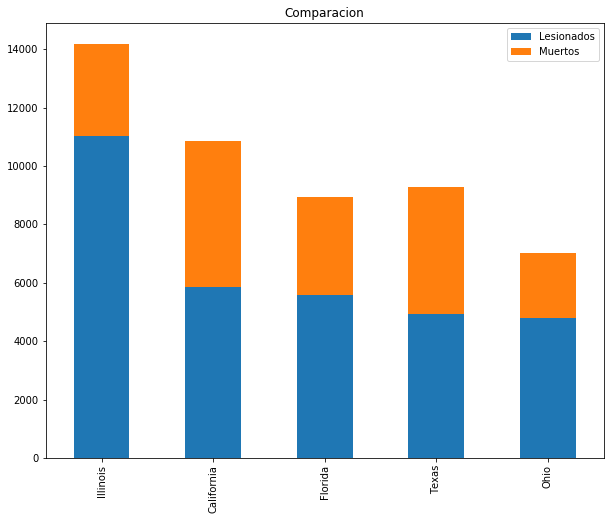

In [13]:
df = pd.DataFrame({
                    'Lesionados': incidentes_lesionados,
                    
                    'Muertos': incidentes_muertos
                  }, index=estados_peligrosos)

df.plot.bar( title="Comparacion",  stacked=True, figsize=(10,8))

Podemos observar en la comparacion que a pesar de que Illinois es el estado con mas incidentes, California es el que mas tasa de muertes tiene.

---
Ahora que ya sabemos los estados mas peligrosos en base a nuestras condiciones, haremos la comparacion de manera general para todos los incidentes

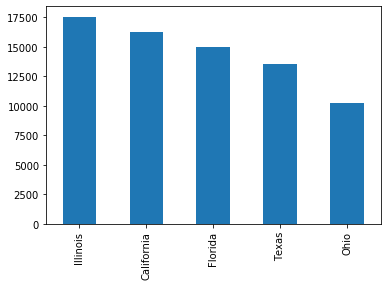

In [14]:
incidentes['estado'].value_counts().head(5).plot.bar()

Podemos observar que los estados con mas registro de incidentes siguen siendo los mismos, por lo que podremos concluir que estos son los estados que mas atencion deben de tener para nuestro analisis

---
Para poder identificar las incidencias en base a la fecha, crearemos otra columna que se llamara periodo, que nos indicara el año y el trimestre en base a la fecha

In [15]:
incidentes['fecha'] = pd.to_datetime(incidentes['fecha'])
incidentes['periodo'] = incidentes.fecha.dt.to_period('Q').dt.strftime('%YQ%q')

estados_periodos = {}
trimestres = list(incidentes.periodo.value_counts(sort=False).sort_index().index)


for estado in estados_peligrosos:
    estados_periodos[estado] = []
    for i, trimestre in enumerate(trimestres, start=0):
        estados_periodos[estado].append( incidentes[(incidentes.estado == estado) & (incidentes.periodo == trimestre) ].estado.count() )

incidentes.periodo.value_counts()

2017Q2    16401
2016Q3    15714
2017Q3    15539
2014Q3    15530
2016Q4    15496
2015Q3    14949
2017Q1    14837
2017Q4    14624
2016Q2    14104
2015Q2    14082
2018Q1    13802
2016Q1    13449
2015Q4    13219
2014Q2    12651
2014Q4    12564
2015Q1    11329
2014Q1    11109
2013Q3       90
2013Q2       75
2013Q4       67
2013Q1       46
Name: periodo, dtype: int64

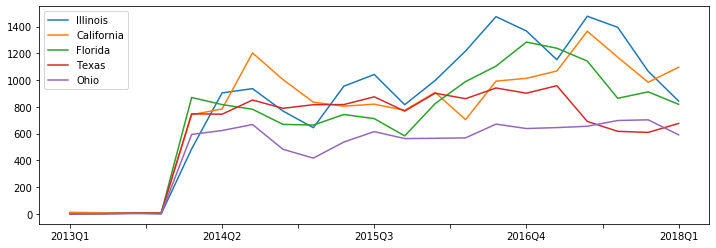

In [16]:

df = pd.DataFrame(estados_periodos, index=trimestres)

lines = df.plot(kind="line", figsize=(12,4))

Al parecer, los datos en el año 2013 no se habian estado registrando correctamente, por lo que los datos en este año seran excluidos del analisis para que no puedan afectar posibles datos predictivos en el futuro

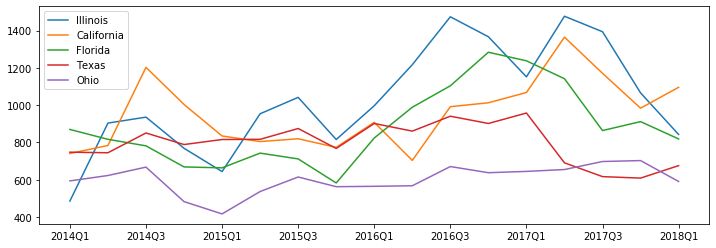

In [17]:
incidentes['anio'] = incidentes.fecha.dt.to_period('Y')
incidentes.anio    = incidentes.anio.astype('int')
incidentes  = incidentes[incidentes.anio > 43]
trimestres = list(incidentes.periodo.value_counts(sort=False).sort_index().index)
estados_periodos = {}
for estado in estados_peligrosos:
    estados_periodos[estado] = []
    for i, trimestre in enumerate(trimestres, start=0):
        estados_periodos[estado].append( incidentes[(incidentes.estado == estado) & (incidentes.periodo == trimestre) ].estado.count() )

                
df = pd.DataFrame(estados_periodos, index=trimestres)

lines = df.plot(kind="line", figsize=(12,4))

En la grafica podemos observar la tendencia de los incidentes en los estados mas peligrosos, vemos que **Illinois** tuvo una alza en los incidentes notable, de la misma manera con **Florida**, empezando con datos por debajo de los mil pero teniendo una alza importante por el 4 trimestre del 2016, sin embargo, hubo estados como **Ohio**, que parece constante, sin subidas bruscas en la cantidad de incidentes. 
Podremos decir que:
- **Illinois**: Tuvo una agresiva alza de incidentes, sobre todo en el año 2016, pero teniendo una baja en picada para el primer trimestre del 2018(**Tendencia a la baja**)
- **California**: Empezó de manera alta en el año 2014, teniendo su apogeo de incidentes en el segundo trimestre del 2017, y manteniendo una tendencia a la alza para el principio del 2018(**Tendencia a la alta**)
- **Florida**: Al principio mantuvo una cantidad promedio de incidentes, pero tuvo un repunte de casos en el 3er trimestre del 2016, pero manteniendo una baja a finales del 2017(**Tendencia a la alta**)
- **Texas**: Empezo de manera igual que  califronia pero logró mantenerse por debajo de los indices de ella, terminando el 2017 con una baja importante de incidentes(**Tendencia a la baja**). 
- **Ohio**: Fue el estado con menos incidentes de los 5, tambien fue el unico que no tuvo alzas bruscas, manteniendo casi siempre una taza normal de incidentes y con una **tendencia a la baja**

---
Para el conteo de armas involucradas, podemos observar como predominan, los incidentes con 1 o menos armas de fuego, mientras que las otras aparecen en grupos mas reducidos

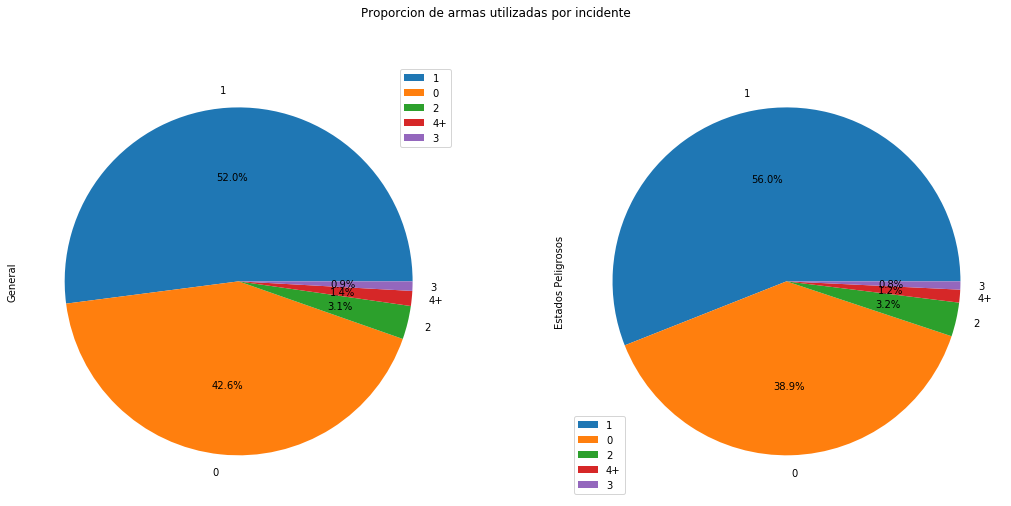

In [18]:
temp1 = incidentes[~incidentes.estado.isin(estados_peligrosos)]['armas_involucradas'].apply(lambda x : "4+" if x>=4 else str(x))
temp = temp1.value_counts()

temp2 = incidentes[incidentes.estado.isin(estados_peligrosos)]['armas_involucradas'].apply(lambda x : "4+" if x>=4 else str(x))
temp3 = temp2.value_counts()

df = pd.DataFrame({
                   'General': temp.values,
                   'Estados Peligrosos' : temp3.values
                  }, 
                index = temp.index)

print(df.plot.pie( title="Proporcion de armas utilizadas por incidente", autopct='%1.1f%%', subplots=True, figsize=(18,8)))

Al comprarar las armas involucradas por incidente, de manera general, por los estados mas peligroso, vemos que hay un ligero aumento en la cantidad de armas utilizadas, lo cual podria explicar el aumento de muertos en estos estados

---
A pesar de  que los con al menos un arma de fuego son mas, el porcentaje de muertos es casi exactamente el mismo que cuando no se utilizan armas

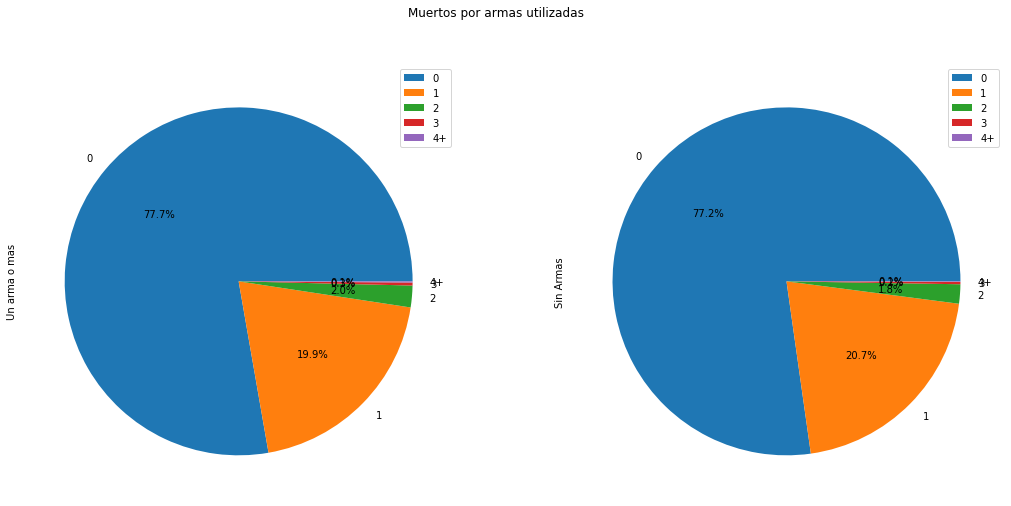

In [51]:

temp  = incidentes[incidentes.armas_involucradas >= 1].num_muertos.apply(lambda x : "4+" if x>=4 else str(x))
temp1 = temp.value_counts()

temp2  = incidentes[incidentes.armas_involucradas == 0].num_muertos.apply(lambda x : "4+" if x>=4 else str(x))
temp3  = temp2.value_counts()

df = pd.DataFrame({
   'Un arma o mas': temp1.values,
   'Sin Armas' : temp3.values
}, 
index = temp1.index)

print(df.plot.pie( title="Muertos por armas utilizadas", autopct='%1.1f%%', subplots=True, figsize=(18,8)))




---
### Participantes
Ahora visualizaremos los datos de los participantes

In [19]:
participantes.head(5)

,incidente_id,index_participante,edad,genero,tipo,arrestado,muerto,herido
0,0,0,20,hombre,victima,1,0,0
1,1,0,20,hombre,victima,0,1,0
2,2,0,25,hombre,sospechoso,1,0,1
3,2,1,31,hombre,sospechoso,1,0,0
4,2,2,33,hombre,victima,0,1,0


In [20]:
participantes.edad.mean()

29.568082936459668

In [21]:
participantes.edad.max()

101

In [22]:
participantes.groupby('incidente_id')['incidente_id'].count().max()

66

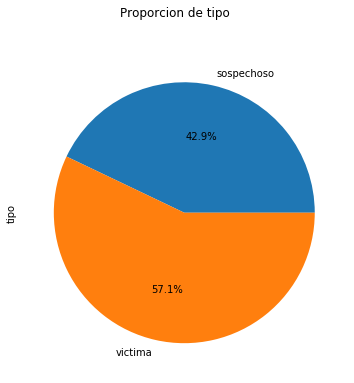

In [23]:

print(participantes.groupby('tipo')['tipo'].count().plot.pie( title="Proporcion de tipo", autopct='%1.1f%%', subplots=True, figsize=(10,6)))


Al describir las columnas, podemos observar diferentes aspectos:
- la mayor edad de un participante es 101
- el promedio de edad es de 29
- en un incidente puede haber hasta 66 participantes
- El 42.9% fueron Sospechoso, y el 57.1% fueron victimas

---
Para tener una vision mas clara de los participantes, los analizaremos separandolos por tipo.

In [24]:
participantes[participantes['tipo'] == 'sospechoso'].mean()

incidente_id          128545.359166
index_participante         0.899948
edad                      29.192168
arrestado                  0.750709
muerto                     0.066912
herido                     0.043224
dtype: float64

Podemos observar que la edad promedio de los participantes es de 29 años, el 75% son arrestados, solo 6% son muertos, y el 4% son heridos

---

Sin embargo, para las victimas cambia un poco, vemos que la edad en promedio sigue manteniendose en 29 años, pero la proporcion de muertos aumenta a 36% y la relacion a los heridos aumenta a poco mas de la mitad de las victimas

In [25]:
participantes[participantes['tipo'] == 'victima'].mean()

incidente_id          117993.700669
index_participante         0.251487
edad                      29.850683
arrestado                  0.012334
muerto                     0.364418
herido                     0.523135
dtype: float64

      muerto  count
0  No muerto  77555
1     Muerto  44467


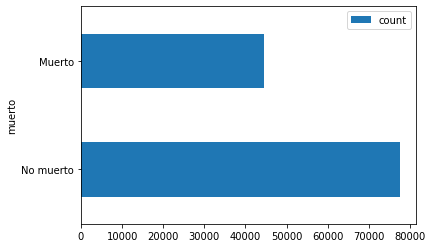

In [101]:
muertos = participantes[participantes.tipo =='victima'].groupby('muerto')['muerto'].count().reset_index(name='count')

muertos.muerto = muertos.muerto.apply(lambda x : "Muerto" if x==1 else "No muerto")
print(muertos)
muertos.plot(kind="barh", x = "muerto")

---
Agrupando los datos por tipo, podemos observar que las victimas superan en frecuencia a los sospechosos, asi como predomina la cantidad de hombres en los incidentes.

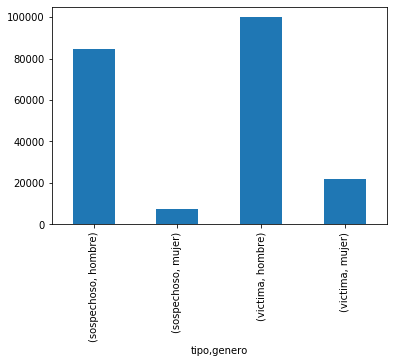

In [103]:
participantes.groupby(['tipo', 'genero'])['tipo'].count().plot.bar(y='frecuency', stacked=True)


---
Se hara una comparacion de las victimas en base al genero y si murio en el incidente, ya que se mostró que el 36% de las victimas morian

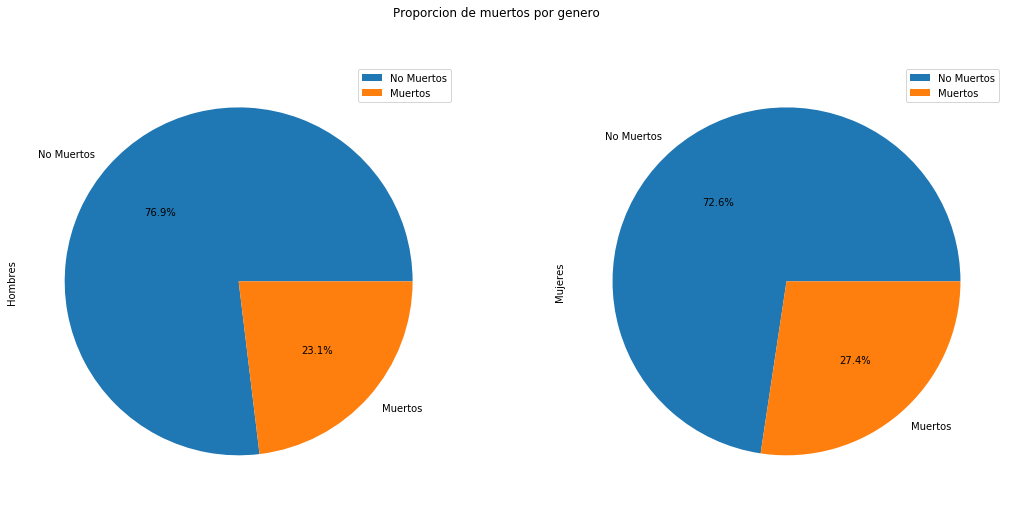

In [174]:
participantes_agrupados = participantes.groupby(['muerto', 'genero'], as_index=False )['incidente_id'].count()

df = pd.DataFrame({
   'Hombres': list( participantes_agrupados[participantes_agrupados.genero == 'hombre'].incidente_id ),
   'Mujeres' : list( participantes_agrupados[participantes_agrupados.genero == 'mujer'].incidente_id ),
  }, 
index = ['No Muertos', 'Muertos'])

print(df.plot.pie( title="Proporcion de muertos por genero", autopct='%1.1f%%', subplots=True, figsize=(18,8)))

Podemos identificar que el porcentaje de muertos por genero no varia mucho

---
En esta Grafica, agrupada por edad, observamos que la frecuencia aumenta drasticamente, al llegar a 20 años, que de hecho es el punto mas alto, pero debido a que la hay mas participantes en los demas grupos de edad, el promedio aumenta a 29 años

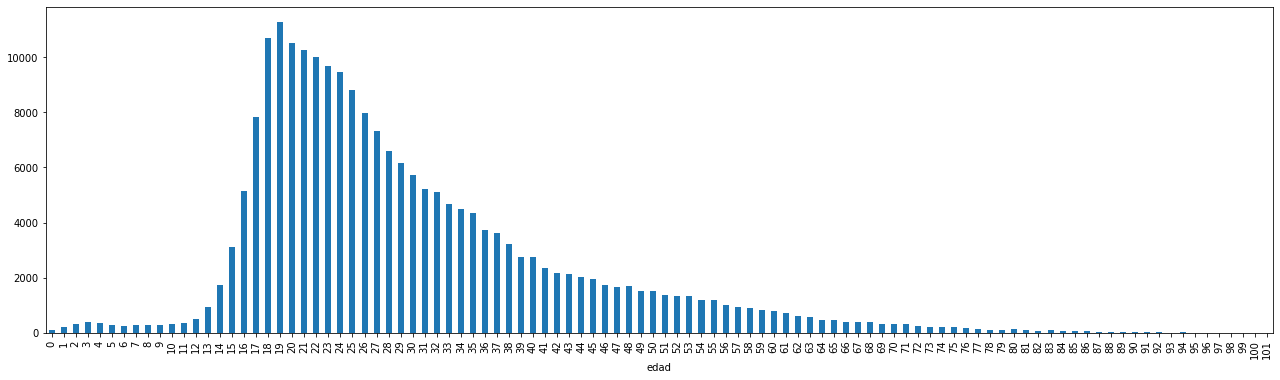

In [30]:
participantes.groupby(['edad'])['edad'].count().plot.bar(y='frecuency', figsize=(22,6))

Sin embargo, si hacemos una comparacion de la misma grafica, pero filtrada por tipo(sospechoso, victima), podemos observar que no hay mucha diferencia entre si,

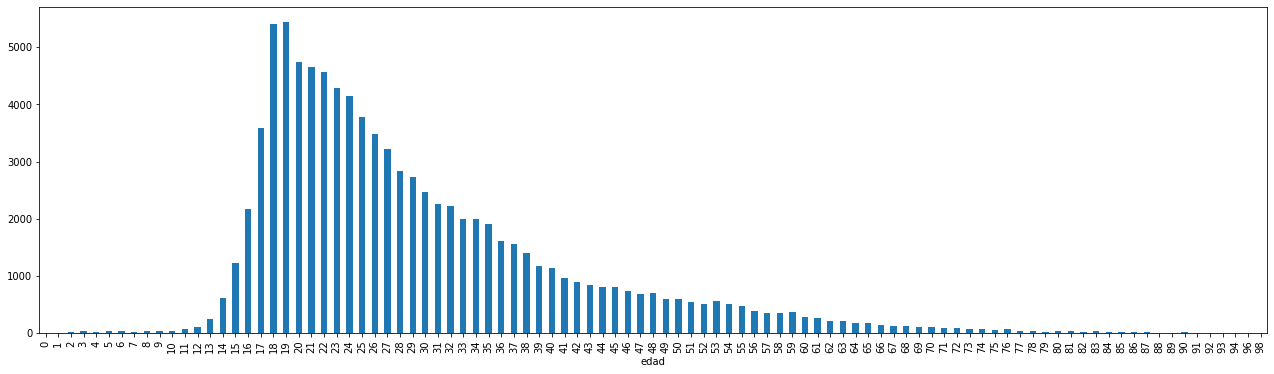

In [31]:
participantes[participantes.tipo=='sospechoso'].groupby(['edad'])['edad'].count().plot.bar(y='frecuency', figsize=(22,6))

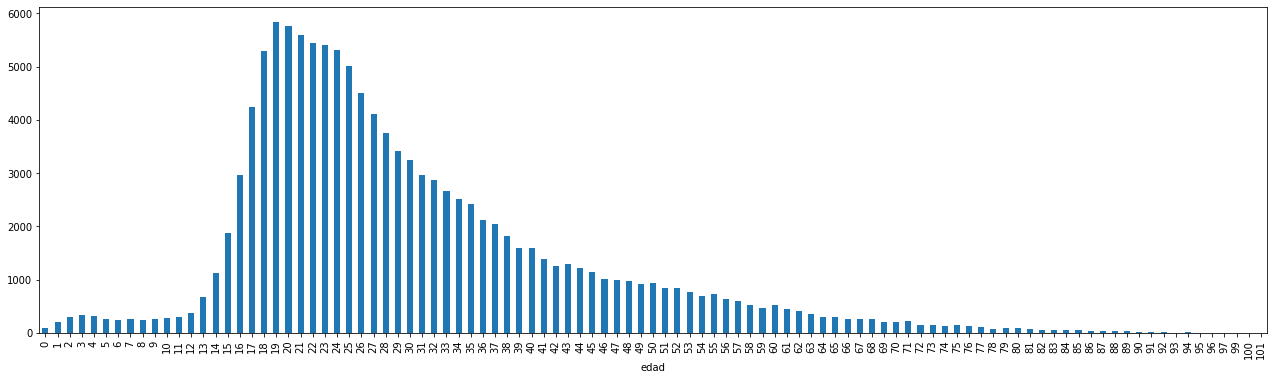

In [32]:
participantes[participantes.tipo=='victima'].groupby(['edad'])['edad'].count().plot.bar(y='frecuency', figsize=(22,6))

---
Al agrupar a los participantes por tipo, podemos observar que como era de esperarse, las victimas son las que mas mueren, de hecho hay una diferencia mayor entre las victimas y los sospechosos que mueren, respecto a los sospechosos y victimas que no mueren.

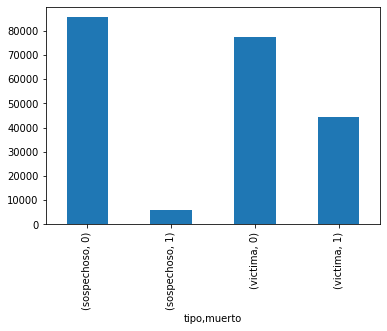

In [34]:
participantes.groupby(['tipo', 'muerto'])['tipo'].count().plot.bar(y='frecuency', stacked=True)

---
### Procedemos a unir los incidentes con los participantes de una manera estructurada

In [24]:
i_p = pd.merge(incidentes, participantes, left_index=True, right_on='incidente_id')